# Data Exploration

## 1 Setup

In [18]:
# import idstools
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

## 2 Import der Daten

Zunächst werden sowohl das Trainings-, als auch das Testdatenset importiert und in Data Frames gespeichert.

In [19]:
data_train = pd.read_csv("../data/BikeRentalDaily_train.csv", sep=";", index_col=0).sort_index()
data_train.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,NaN,0,1,0,6,0,2,13.7667,0.363625,120.87495,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
3,03.01.2011,NaN,0,1,0,1,1,1,7.8546,0.189405,65.59095,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600


In [20]:
data_test = pd.read_csv("../data/BikeRentalDaily_test.csv", sep=";", index_col=0).sort_index()
data_test.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
7,07.01.2011,1.0,0,1,0,5,1,2,7.8609,0.208839,74.80440,0.168726,977,0,148,1362,1510
11,11.01.2011,1.0,0,1,0,2,1,2,6.7636,0.191464,102.95460,0.122132,1028,0,43,1220,1263
14,14.01.2011,1.0,0,1,0,5,1,1,6.4348,0.188413,80.67390,0.126548,481,0,54,1367,1421
16,16.01.2011,1.0,0,1,0,0,0,1,9.2667,0.234217,72.56250,0.188433,493,0,251,953,1204
18,18.01.2011,1.0,0,1,0,2,1,2,8.6667,0.232333,129.25005,0.146775,989,0,9,674,683


Die beiden Data Frames werden nun zusammengeführt.

In [21]:
data = pd.concat([data_train, data_test])

Im Folgenden sind die Datentypen der einzelnen Variablen im Datenset ersichtlich.

In [22]:
data.dtypes

dteday              object
season             float64
yr                   int64
mnth                 int64
holiday              int64
weekday              int64
workingday           int64
weathersit           int64
temp               float64
atemp              float64
hum                float64
windspeed          float64
leaflets             int64
price reduction      int64
casual               int64
registered           int64
cnt                  int64
dtype: object

Im Data Dictionary sind weiterführende Definitionen sowie Typ und Rolle der einzelnen Variablen ersichtlich.

In [23]:
meta = pd.read_excel('../data/meta.xlsx')
meta

,Variable,Description,Format,Role,Type
0,dteday,Date,object,predictor,numeric discrete
1,season,"Season (1=winter, 2=spring, 3=summer, 4=fall)",float64,predictor,categorial nominal
2,yr,Year,int64,predictor,numeric discrete
3,mnth,Month (1-12),int64,predictor,numeric discrete
4,holiday,"1=holiday, 0=no holiday",int64,predictor,categorial nominal
5,weekday,Day of the week,int64,predictor,numeric discrete
6,workingday,"1=neither weekend nor holiday, 0=weekend or ho...",int64,predictor,categorial nominal
7,weathersit,Weather Situation (1-4),int64,predictor,categorial ordinal
8,temp,Temperature,float64,predictor,numeric continous
9,atemp,Feeling temperature,float64,predictor,numeric continous


## 3 Missing Values ##

Mit Hilfe der folgenden Matrix ist schnell ersichtlich, in welchen Spalten und in welchem Umfang fehlende Werte vorliegen. Betroffen sind die Variablen `season` und `hum`.

<Axes: >

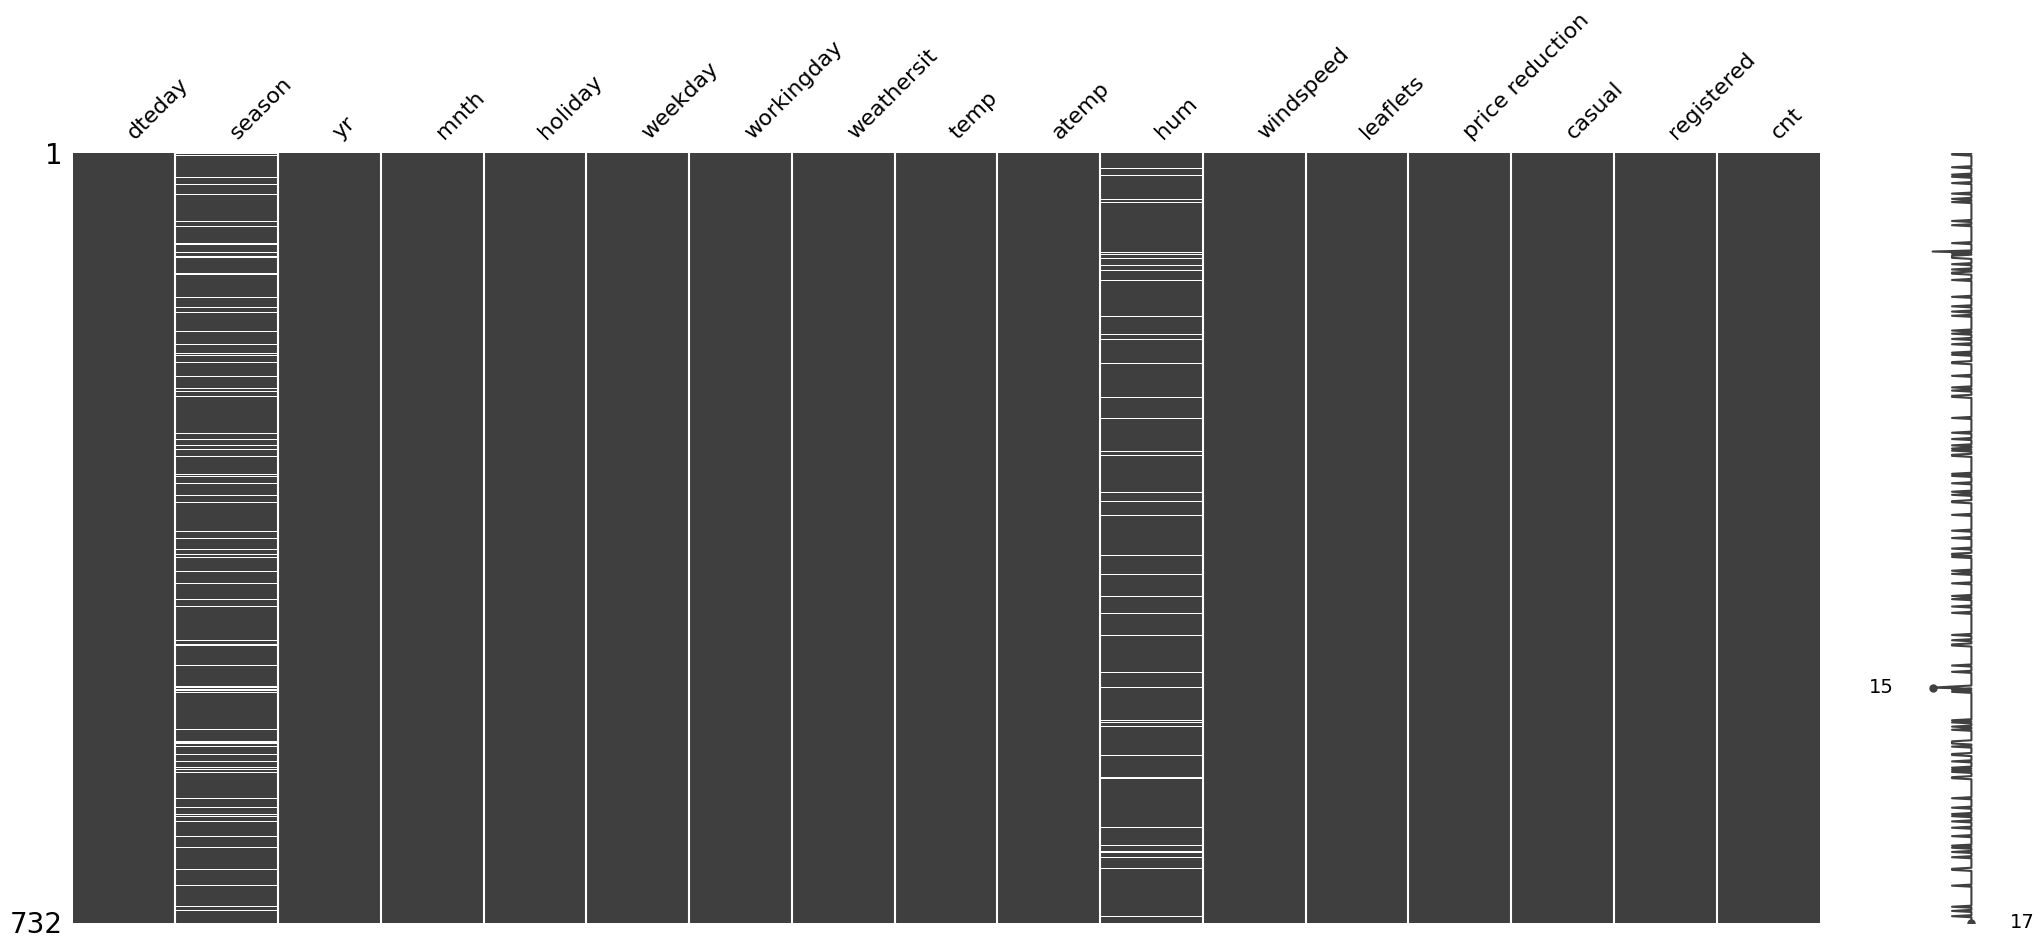

In [24]:
msno.matrix(data)

In [25]:
data.isna().sum()

dteday              0
season             73
yr                  0
mnth                0
holiday             0
weekday             0
workingday          0
weathersit          0
temp                0
atemp               0
hum                40
windspeed           0
leaflets            0
price reduction     0
casual              0
registered          0
cnt                 0
dtype: int64

## 4 Descriptive Analysis

Wir nutzen die Describe-Methode, um einen ersten Überblick über die Struktur der numerischen Variablen zu erhalten. Hierbei wird eine Zusammenfassung zu den wichtigsten statistischen Kennzahlen erstellt.

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,659.0,2.476480,1.112505,1.00000,1.000000,2.000000,3.000000,4.000000
yr,732.0,0.500000,0.500342,0.00000,0.000000,0.500000,1.000000,1.000000
mnth,732.0,6.524590,3.451948,1.00000,4.000000,7.000000,10.000000,12.000000
holiday,732.0,0.028689,0.167044,0.00000,0.000000,0.000000,0.000000,1.000000
weekday,732.0,2.867486,2.095577,-1.00000,1.000000,3.000000,5.000000,6.000000
workingday,732.0,0.684426,0.465062,0.00000,0.000000,1.000000,1.000000,1.000000
weathersit,732.0,1.396175,0.544980,1.00000,1.000000,1.000000,2.000000,3.000000
temp,732.0,19.814779,7.317049,2.36520,13.491675,19.933300,26.208325,34.466700
atemp,732.0,0.474352,0.162850,0.07907,0.337891,0.485158,0.608289,0.840896
hum,692.0,93.808823,21.381071,0.00000,77.841075,93.350550,109.390650,145.875000


**Erkenntnisse:**

- Auch hier ist in der Spalte Count nochmals ersichtlich, dass die Variablen `season` und `hum` fehlende Werte aufweisen.
- In den Zeilen für `weekday` und `windspeed` fällt auf, dass negative Werte von `-1` vorliegen (siehe Spalte Minimum). Hierbei handelt es sich vermutlich um Datenfehler, die später bereinigt werden müssen. Da die Windgeschwindikeit nicht negativ sein kann, könnte man die entsprechenden Beobachtungen nach genauerer Analyse eventuell löschen. Auch die Beobachtungen mit Wochentag -1 sollten genauer betrachtet werden.
- Die Variable `casual` beinhaltet extreme Ausreißer, da der Abstand zwischen Maximalwert und 75% nicht dem zwischen Median und 75% entspricht.
- Zu den Variablen `atemp`, `hum` und `windspeed` sind uns die Maßeinheiten nicht bekannt.

## 5 Exploratory Data Analysis and Relationships ##

Für die numerischen Variablen werden zunächst Boxplots erstellt. Diese bietet eine visuelle Darstellung der Verteilung, Zentralneigung und Streuung der Daten.

c:\Users\doree\anaconda3\envs\introduction-data-science\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\doree\anaconda3\envs\introduction-data-science\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\doree\anaconda3\envs\introduction-data-science\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\doree\anaconda3\envs\introduction-data-sci

Text(0.5, 1.0, 'Numeric Variables 1')

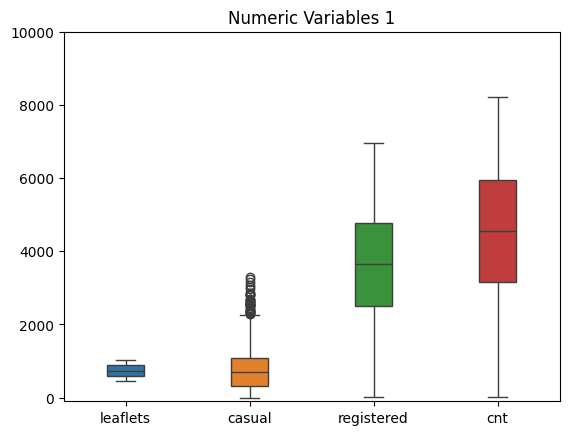

In [27]:
numeric_vars_large = ["leaflets", "casual", "registered", "cnt"]
sns.boxplot(data=data[numeric_vars_large], width=0.3)
plt.ylim([-100, 10000])
plt.title("Numeric Variables 1")

Auch in dem vorliegenden Boxplot ist die extreme Streuung der Variablen `casual` ersichtlich.

c:\Users\doree\anaconda3\envs\introduction-data-science\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


c:\Users\doree\anaconda3\envs\introduction-data-science\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\doree\anaconda3\envs\introduction-data-science\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\doree\anaconda3\envs\introduction-data-science\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\doree\anaconda3\envs\introduction-data-science\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When groupi

Text(0.5, 1.0, 'Numeric Variables 2')

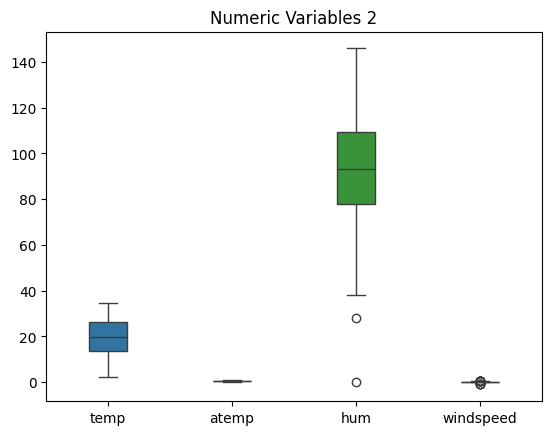

In [28]:
numeric_vars_small = ["temp", "atemp", "hum", "windspeed"]
sns.boxplot(data=data[numeric_vars_small], width=0.3)
plt.title("Numeric Variables 2")

Im Anschluss wollen wir einen Blick auf die kategorialen Variablen werfen und erstellen eine "Subplot-Matrix" von Kreisdiagrammen. So lässt sich bereits auf den ersten Blick die Verteilung der verschiedenen Kategorien für mehrere kategoriale Variablen visualisieren, um Muster oder Trends zu identifizieren.

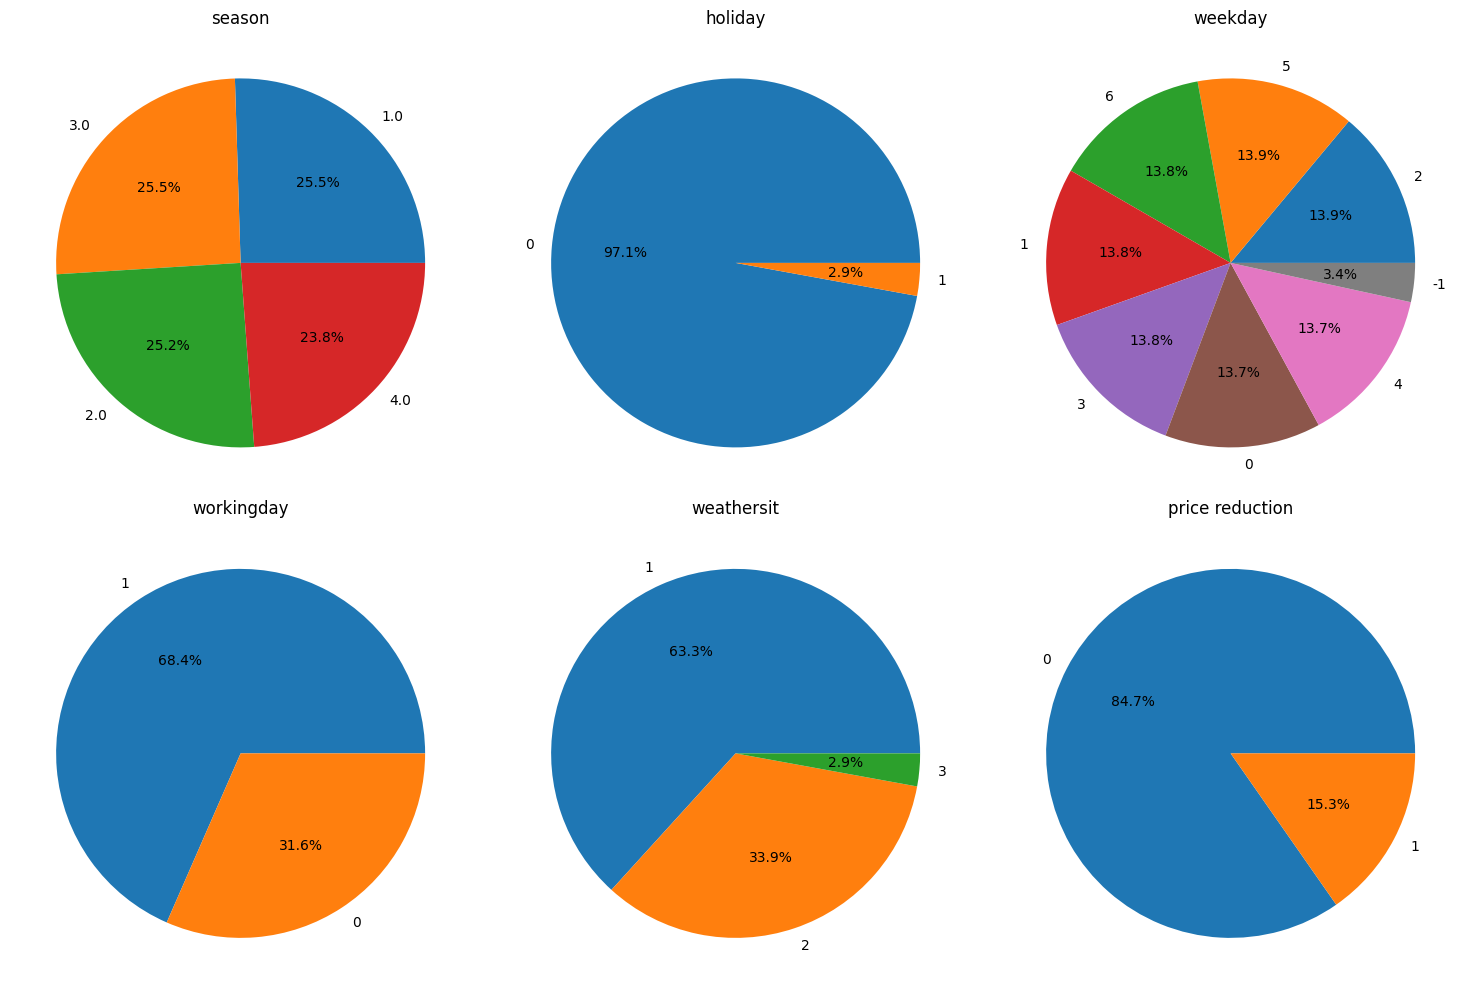

In [29]:
plt.figure(figsize=(15, 10))
features = ["season", "holiday", "weekday", "workingday", "weathersit", "price reduction"]
for i, var in enumerate(features, 1):
    v_counts = data[var].value_counts()
    plt.subplot(2, 3, i)
    plt.pie(x=v_counts, labels=v_counts.index, autopct='%1.1f%%')
    plt.title(var)

plt.tight_layout()
plt.show()

In [30]:
features = ["season", "holiday", "weekday", "workingday", "weathersit", "price reduction"]
charts = []

for feature in features:
    chart = alt.Chart(data).mark_bar().encode(
        x=alt.X(f"{feature}:O", title=feature),
        y='count()',
        tooltip='count()'
    ).properties(
        title=f'{feature}',
        width=100,
        height=150
    )
    charts.append(chart)

alt.hconcat(*charts)

alt.HConcatChart(...)

**Erkenntnisse:**

- `season`: Die Verteilung der Beobachtungen im Datenset auf die vier Jahreszeiten scheint eher gleichmäßig zu sein. Die Variable weist noch eine gewisse Anzahl an fehlenden Werten auf. Diese müssten im Zuge der Data Preparation addressiert werden.
- `holiday`: Es liegen deutlich mehr Beobachtungen an Nicht-Feiertagen vor. Dies könnte eventuell auch daran liegen, dass es grundsätzlich weniger Feiertage als Nicht-Feiertage gibt.
- `weekday`: Bis auf den Tag 1 scheinen die Beobachtungen gleichmäßig auf die Wochentage verteilt zu sein.
- `workingday`: Es liegen mehr Beobachtungen an Arbeitstagen als an Nicht-Arbeitstagen vor. Auch hier könnte es daran liegen, dass es grundsätzlich mehr Arbeitstage als freie Tage gibt.
- `weathersit`: Die meisten Beobachtungen liegen an Tagen mit Weathersit 1 und 2 vor, sprich an klaren oder wenig bewölten Tagen (1) oder an nebelig, bwölkten Tagen (2).
- `price reduction`: Aktionen für Preisreduzierungen könnten selten sein, weshalb das Datenset mehr Beobachtungen ohne Preisreduzierung aufweist.

Um die numerischen Variablen und deren Verteilung noch etwas eingehender zu analysieren, erstellen wir ein Raster von Histogrammen für alle numerischen Variablen in unserem Dataset. Des Weiteren fügen wir eine zusätzlichen Informationen zur Schiefe (Skewness) jeder Variablen bei. Hierdurch wird eine schnelle Einschätzung der Asymmetrie der Verteilung ermöglicht.

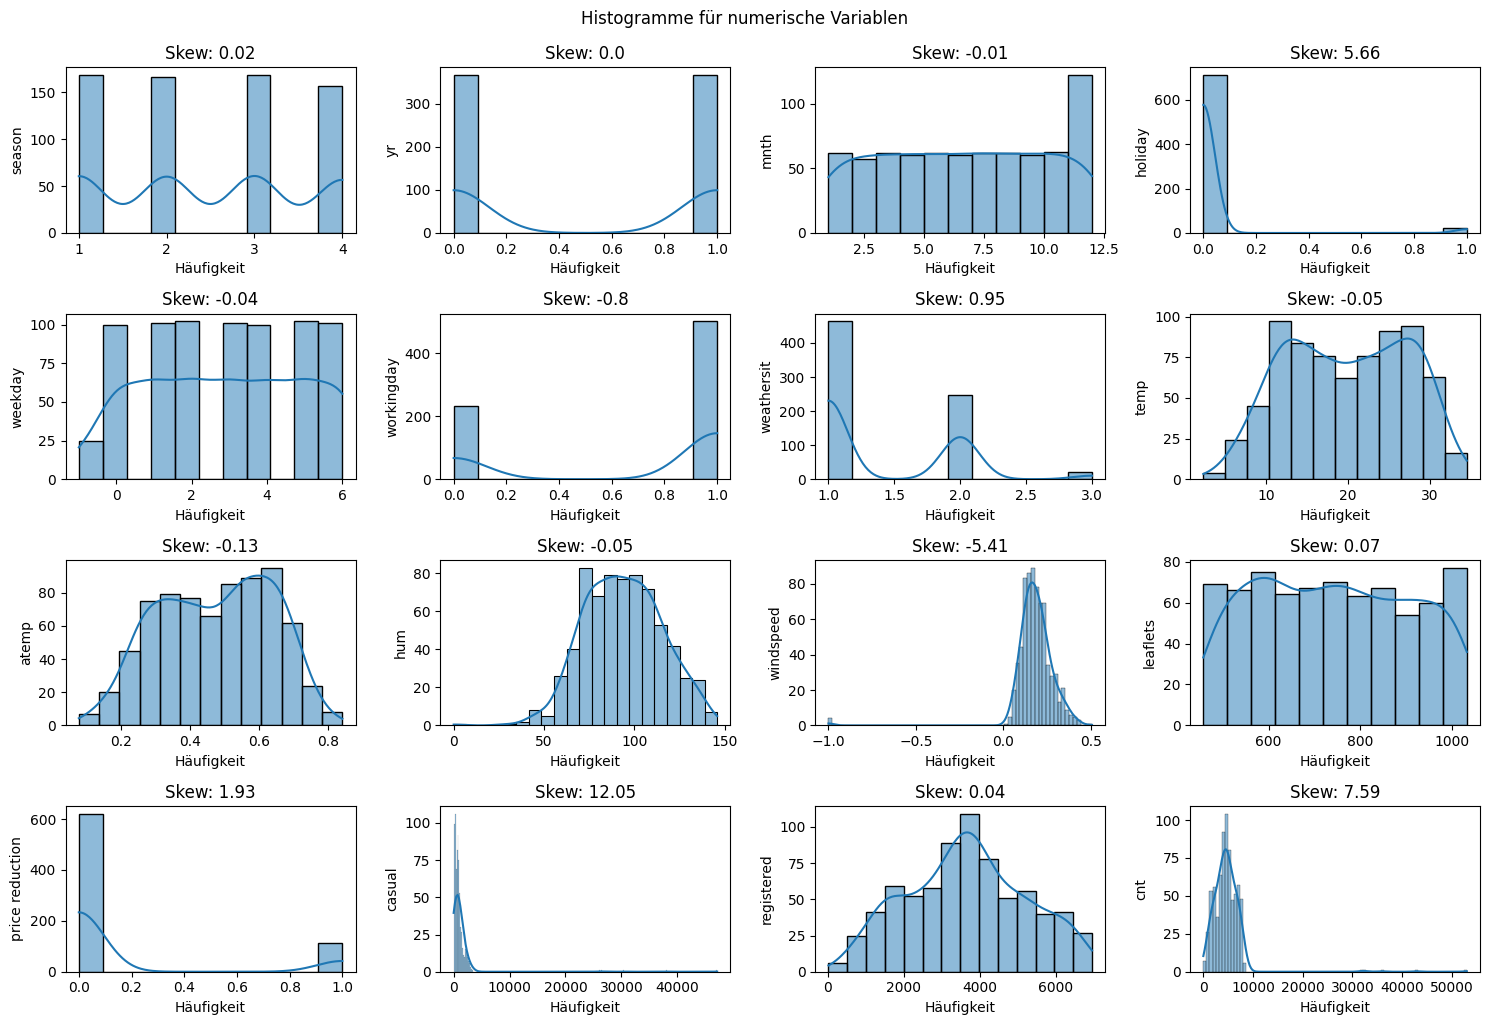

In [31]:
plt.figure(figsize=(15, 10))
features = [f for f in data.columns.tolist() if f not in ["dteday"]]
for i, var in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[var], kde=True)
    plt.title(f"Skew: {round(data[var].skew(), 2)}")
    plt.ylabel(var)
    plt.xlabel("Häufigkeit")

plt.tight_layout()
plt.suptitle("Histogramme für numerische Variablen", y=1.02)
plt.show()

**Erkenntnisse:**

- Die Variablen `cnt` und `casual` zeigen deutliche Ausreißer und eine stark rechtsschiefe Verteilung.
- Die beiden Variablen `temp` und `atemp` haben eine bimodale Verteilung und sind linear abhängig. Wir vermuten, dass hinter der Verteilung saisonalen Temperatureschwankungen stecken.
- Die Variable `windspeed` weist eine linksschiefe Vertilung aufgrund invalider Werte (-1) auf.
- Die Variablen `hum` und `windspeed` sind normalverteilt.




Um einen ersten Überblick über die Zusammenhänge zwischen den verschiedenen numerischen Variablen und der Response Variable `cnt` zu erhalten, werden Scatterplots erstellt. Muster, wie beispielsweise lineare Beziehungen, Trends und Ausreißer, können so schnell identifiziert werden.

In [32]:
alt.Chart(data).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['cnt'],
    column=numeric_vars_large + numeric_vars_small
).interactive()

alt.RepeatChart(...)

Durch Ausreißer werden die Darstellungen auf den ersten Blick teils stark verzerrt. Scrollt man entsprechend, sodass die Skalierung angepasst wird, so ist ersichltich, dass `cnt` und `casual`, `cnt` und `registered`, `cnt` und `temp` sowie `atemp` eine positiv lineare Beziehung aufweisen.

Im Folgenden werden die Korrelationskoeffizienten zwischen den numerischen Variablen und `cnt` berechnet. Je höher der Korrelationskoeffizient, desto stärker die lineare Beziehung zwischen den Variablen. Ein positiver Korrelationskoeffizient impliziert, dass wenn die Werte einer Variablen ansteigen, die Werte der anderen Variablen ebenfalls dazu tendieren anzusteigen. Bei negativen Korrelationskoeffizienten ist dies genau andersherum.

Die Variable `casual` weist die stärkste positiv lineare Beziehung mit einem Korrelationskoeffizient von 0,89 zur Variablen `cnt` auf. Auch die Variable `registered` könnte mit einem Korrelationskoeffizient von 0,59 für das weitere Vorgehen interessant sein.

In [33]:
selected_columns = numeric_vars_large + numeric_vars_small
corr_subset = data[selected_columns].corr()

sorted_corr_subset = corr_subset['cnt'].sort_values(ascending=False)

print(sorted_corr_subset)

cnt           1.000000
casual        0.899574
registered    0.597514
atemp         0.386527
temp          0.383202
leaflets      0.037202
hum          -0.073123
windspeed    -0.091424
Name: cnt, dtype: float64


Um einen Gesamtüberblick über die Korrelationskoeffizienten zwischen allen Variablen innerhalb unseres Datensatzes zu erhalten, erstellen wir eine Korrelationsmatrix. Durch die verbesserte Visualisierung mit Hilfe der Heatmap sind hohe Werte in den dunkleren Rot- bzw. Blautönen schnell ersichtlich.

<Axes: >

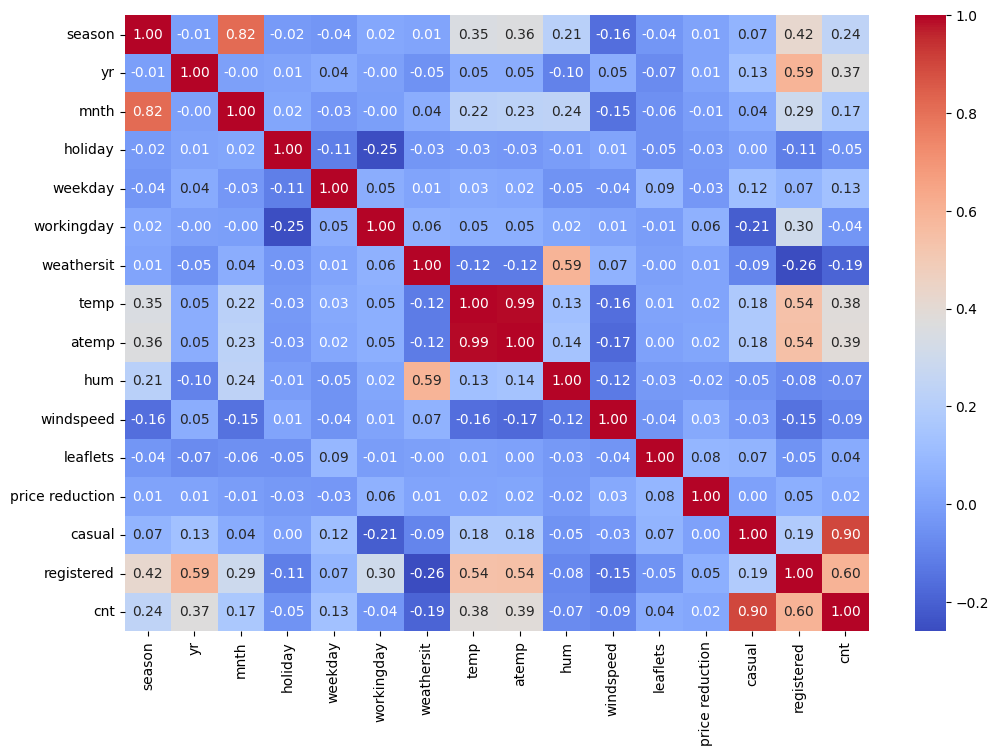

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")